# **Analysis**

## Objectives

* Data analysis following the data preparation executed under Data_ETL.ipynb

## Inputs

* Cleaned data processed under Data_ETL.ipynb

## Outputs

* Statistics and visualisations for the business requirements


# 1 Import packages

Import relevant packages required for data analysis and visualisation

Import NumPy, Pandas, Matplotlib, Seaborn and Plotly:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2 Data extract and familiarisation

Read in csv file and familiarise with the file structure at a high level, through use of various dataframe methods:

In [2]:
df = pd.read_csv('../data/inputs/cleaned/insurance_data_cleaned.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal_weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [3]:
df.shape

(1337, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1337 non-null   int64  
 1   sex           1337 non-null   object 
 2   bmi           1337 non-null   float64
 3   children      1337 non-null   int64  
 4   smoker        1337 non-null   object 
 5   region        1337 non-null   object 
 6   charges       1337 non-null   float64
 7   weight_group  1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.7+ KB


The dataset is as expected, 1337 rows and 8 columns with the "weight_group" field that was added.  Data types for the columns look fine.

Drilling into the data a bit more to get a sense of the data distribution.

Seaborn Displot offers a good visualisation of the population split by multiple attributes.
In the visualisation below, we have the population of females and males (split into smoker and non-smoker) plotted in each bar chart.
Regions are plotted across the columns and weight_groups are plotted across the rows.

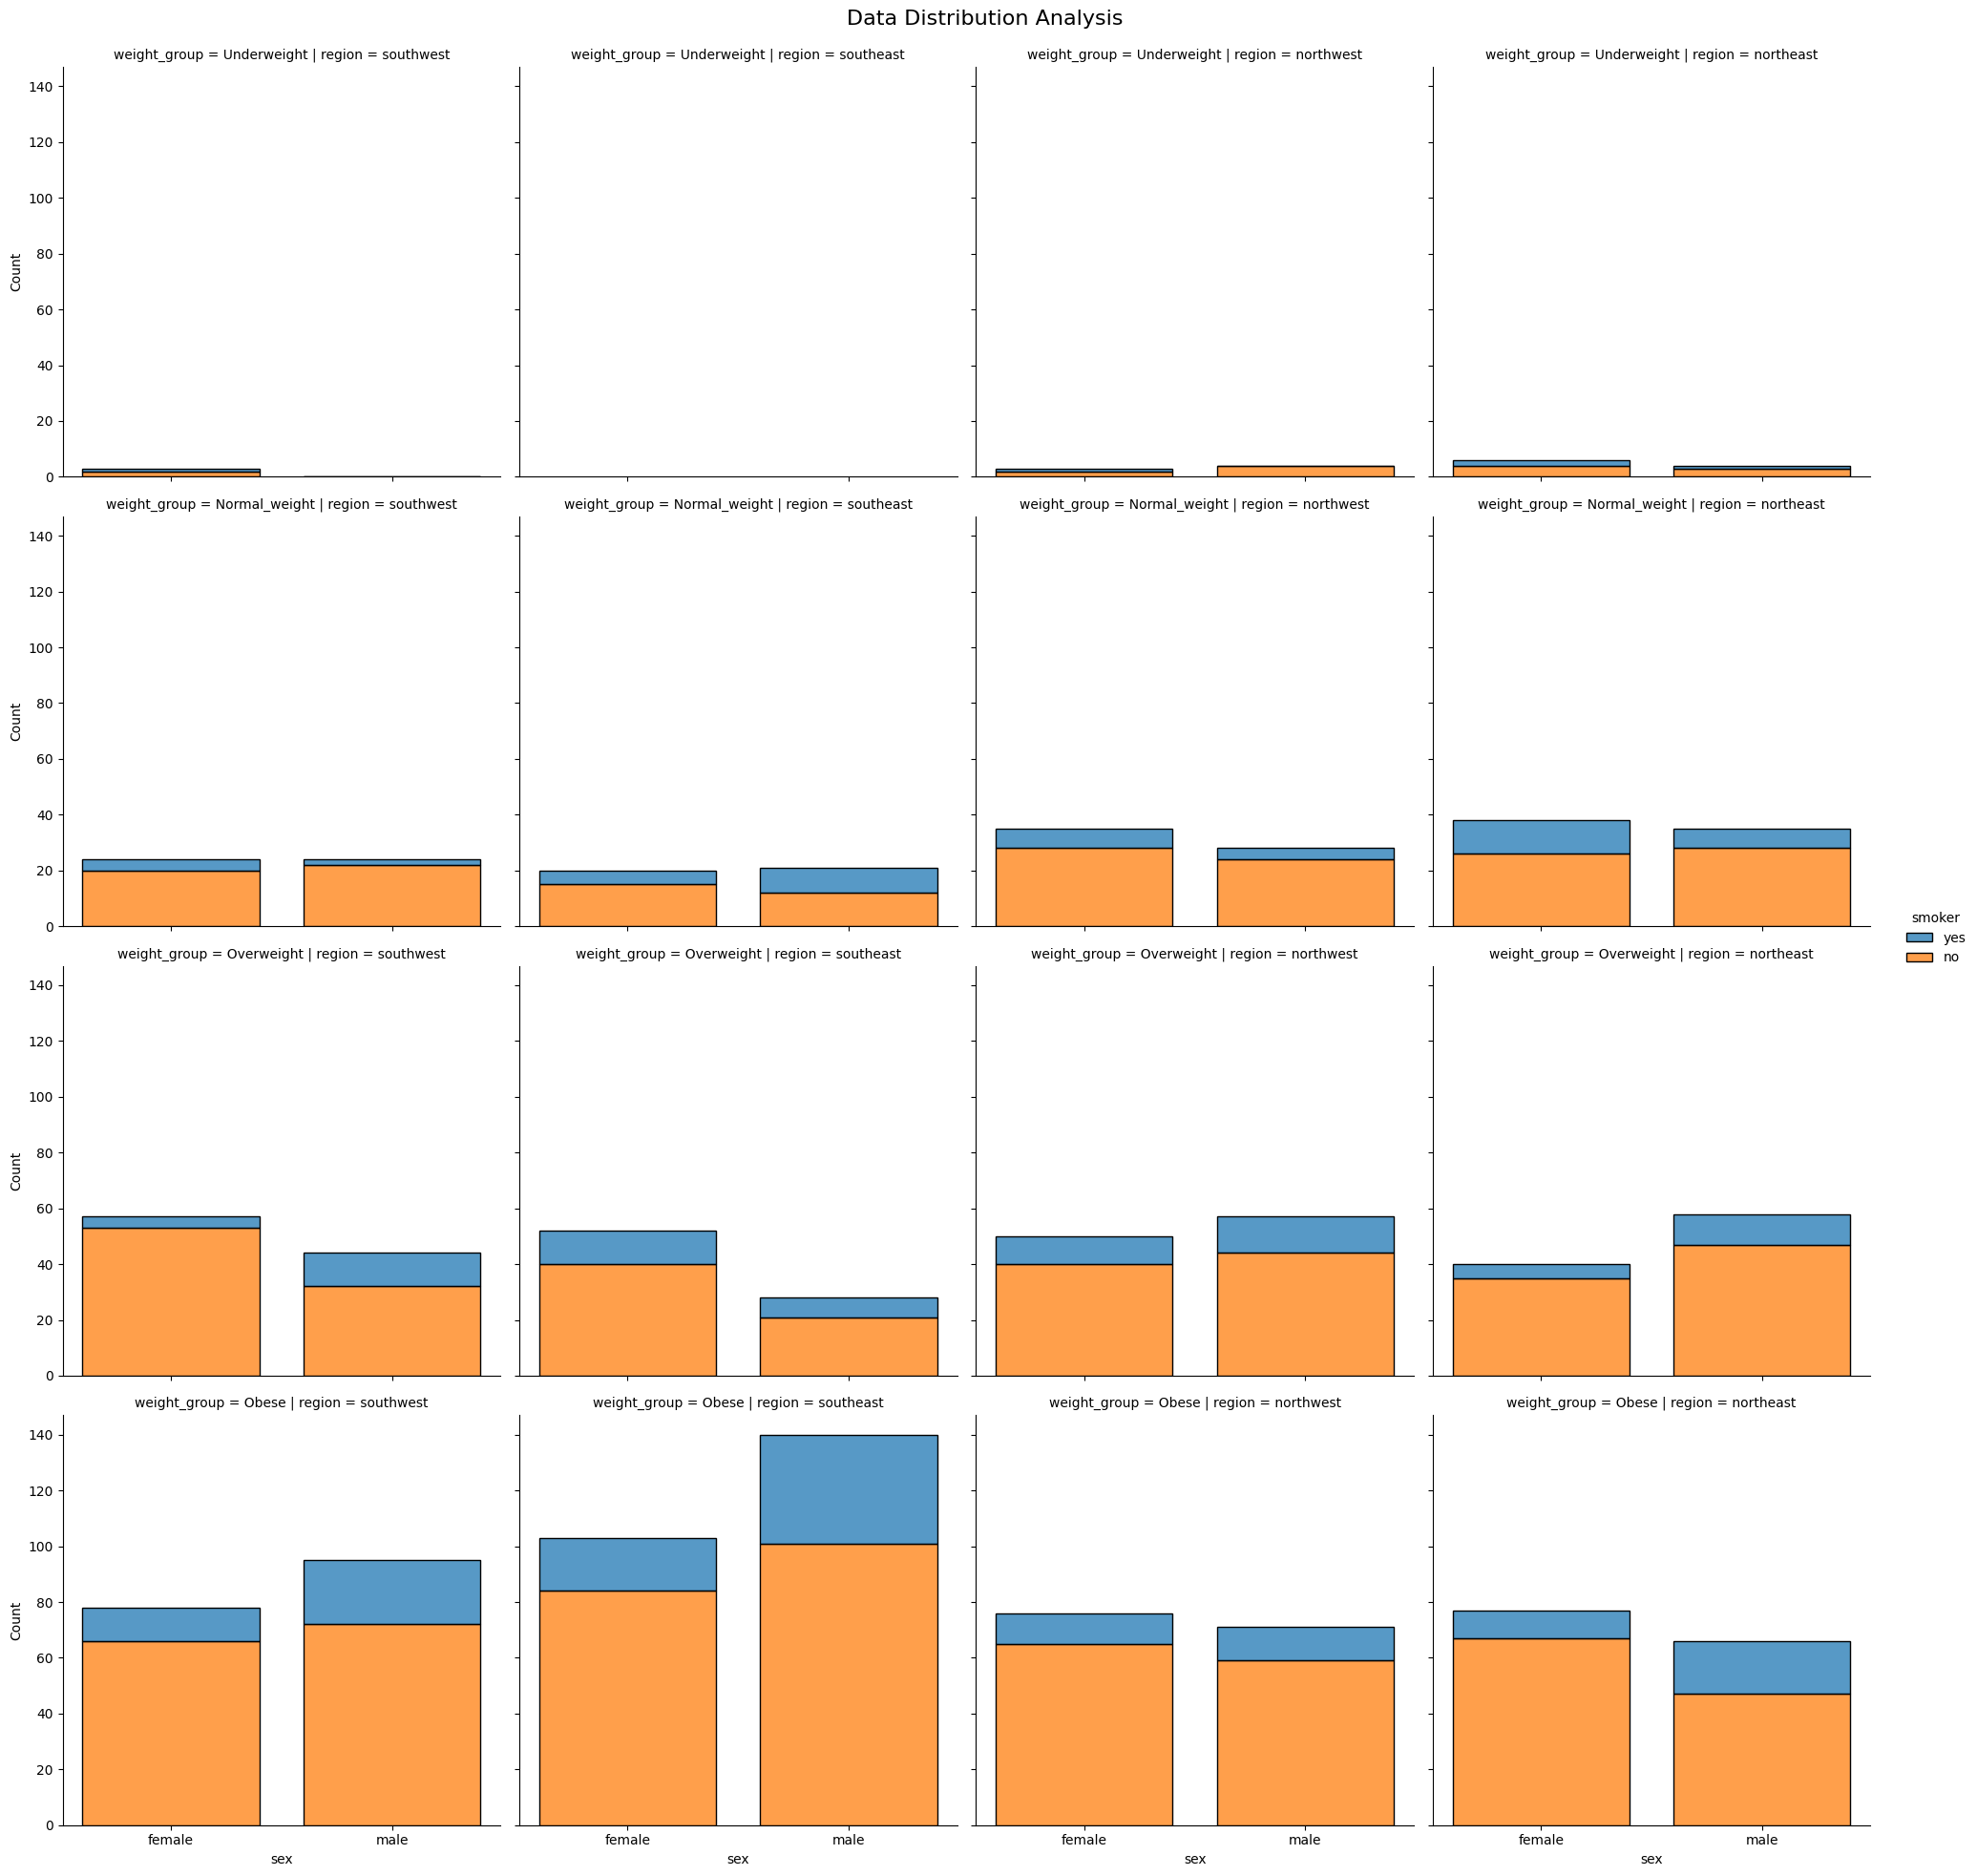

In [5]:
# Define the order of the weight groups to give a more logical flow in our presentation:
weight_order = ['Underweight', 'Normal_weight', 'Overweight', 'Obese']
df['weight_group'] = pd.Categorical(df['weight_group'], categories=weight_order, ordered=True)

# Leave gap between the bars using the "shrink" parameter
datadist_plot = sns.displot(df, x="sex", col="region", row="weight_group", hue="smoker", multiple='stack', shrink=0.8)

# Add a title for the plot
datadist_plot.fig.suptitle('Data Distribution Analysis', fontsize=16)

# Adjust layout to avoid overlapping between the title and the charts
datadist_plot.fig.subplots_adjust(top=0.95)

plt.show()

### Observations:
1) Distributions of the insured populations in the dataset are broadly similar across all regions.  Most of the population falls under the obese category for all regions, followed by overweight.  There are relatively few counts in the normal and almost negligible in underweight.
2) Non-smoker dominates in the dataset.  There are noticeably more smokers in the obese and overweight categories, particularly in the Southwest and Southeast regions.
3) Male and female populations are roughly the same across all regions.  Southeast has higher overall population relative to other regions, as well as the biggest male vs female population differential.  See Pivot Table below.

In [6]:
pd.pivot_table(data=df,index='region',columns='sex',aggfunc='size')


sex,female,male
region,,
northeast,161,163
northwest,164,160
southeast,175,189
southwest,162,163


# 3 Basic statistics

We shall examine average charges by age, gender and region, in turn for each individual attribute initially.


Average charges by age:

In [7]:
df_age_grouped = df.groupby(['age'])['charges'].mean().reset_index().round(2)
df_age_grouped

,age,charges
0,18,7086.22
1,19,9868.93
2,20,10159.70
3,21,4730.46
4,22,10012.93
5,23,12419.82
6,24,10648.02
7,25,9838.37
8,26,6133.83
9,27,12184.70


A chart would be helpful to visualise the relationship between age and average charges.  We use Seaborn "LM plot":

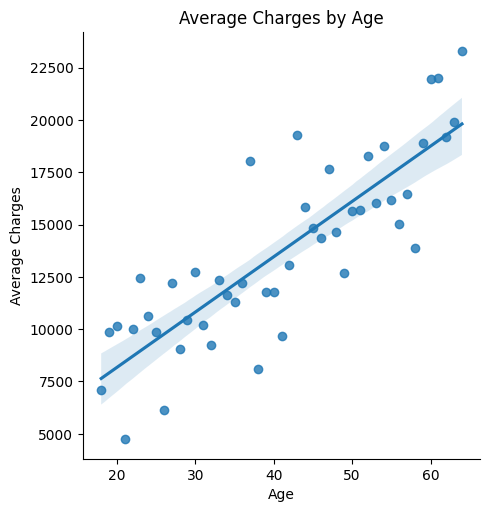

In [8]:
avg_charge_age_chart = sns.lmplot(data=df_age_grouped, x="age", y="charges")

# Update labels and title
avg_charge_age_chart.set_axis_labels('Age', 'Average Charges')
plt.title('Average Charges by Age')

plt.show()

Average charges by gender:

In [9]:
df_sex_grouped = df.groupby(['sex'])['charges'].mean().reset_index().round(2)
df_sex_grouped

,sex,charges
0,female,12569.58
1,male,13975.00


Average charges by region:

In [10]:
df_region_grouped = df.groupby(['region'])['charges'].mean().reset_index().round(2)
df_region_grouped

,region,charges
0,northeast,13406.38
1,northwest,12450.84
2,southeast,14735.41
3,southwest,12346.94


Observations:

1) Average charges broadly increase with age.  There is a fairly wide dispersion from the tram line, which is likely to be driven by other factors such as gender, smoker status, region, BMI category.
2) Average overall female charges are lower than male.  Further breakdown by other factors may provide greater insight.
3) Southeast region has the highest average charge.  This could be a reflection of the region having the highest count of obese population.

# 4 Correlations between different attributes and average charges

We extend from the previous section and examine the impact of region, gender, age and smoker status on average charges with visualisation.

We first use the "groupby" function to create a Pivot Table, which shows average charges for each of the combinations across region, gender, age and smoker status:

In [11]:
df_multi_grouped = df.groupby(['region','sex','age','smoker'])['charges'].mean().reset_index().round(2)
df_multi_grouped

,region,sex,age,smoker,charges
0,northeast,female,18,no,4191.84
1,northeast,female,18,yes,14283.46
2,northeast,female,20,no,2458.47
3,northeast,female,21,no,2876.65
4,northeast,female,21,yes,15359.10
...,...,...,...,...,...
561,southwest,male,61,no,20257.67
562,southwest,male,61,yes,47403.88
563,southwest,male,62,no,12968.24
564,southwest,male,63,no,13984.79


In the Seaborn LM plot below, we have the relationship between age and average charges (split into smoker and non-smoker) plotted in each chart.
Regions are plotted across the columns and genders are plotted across the rows.

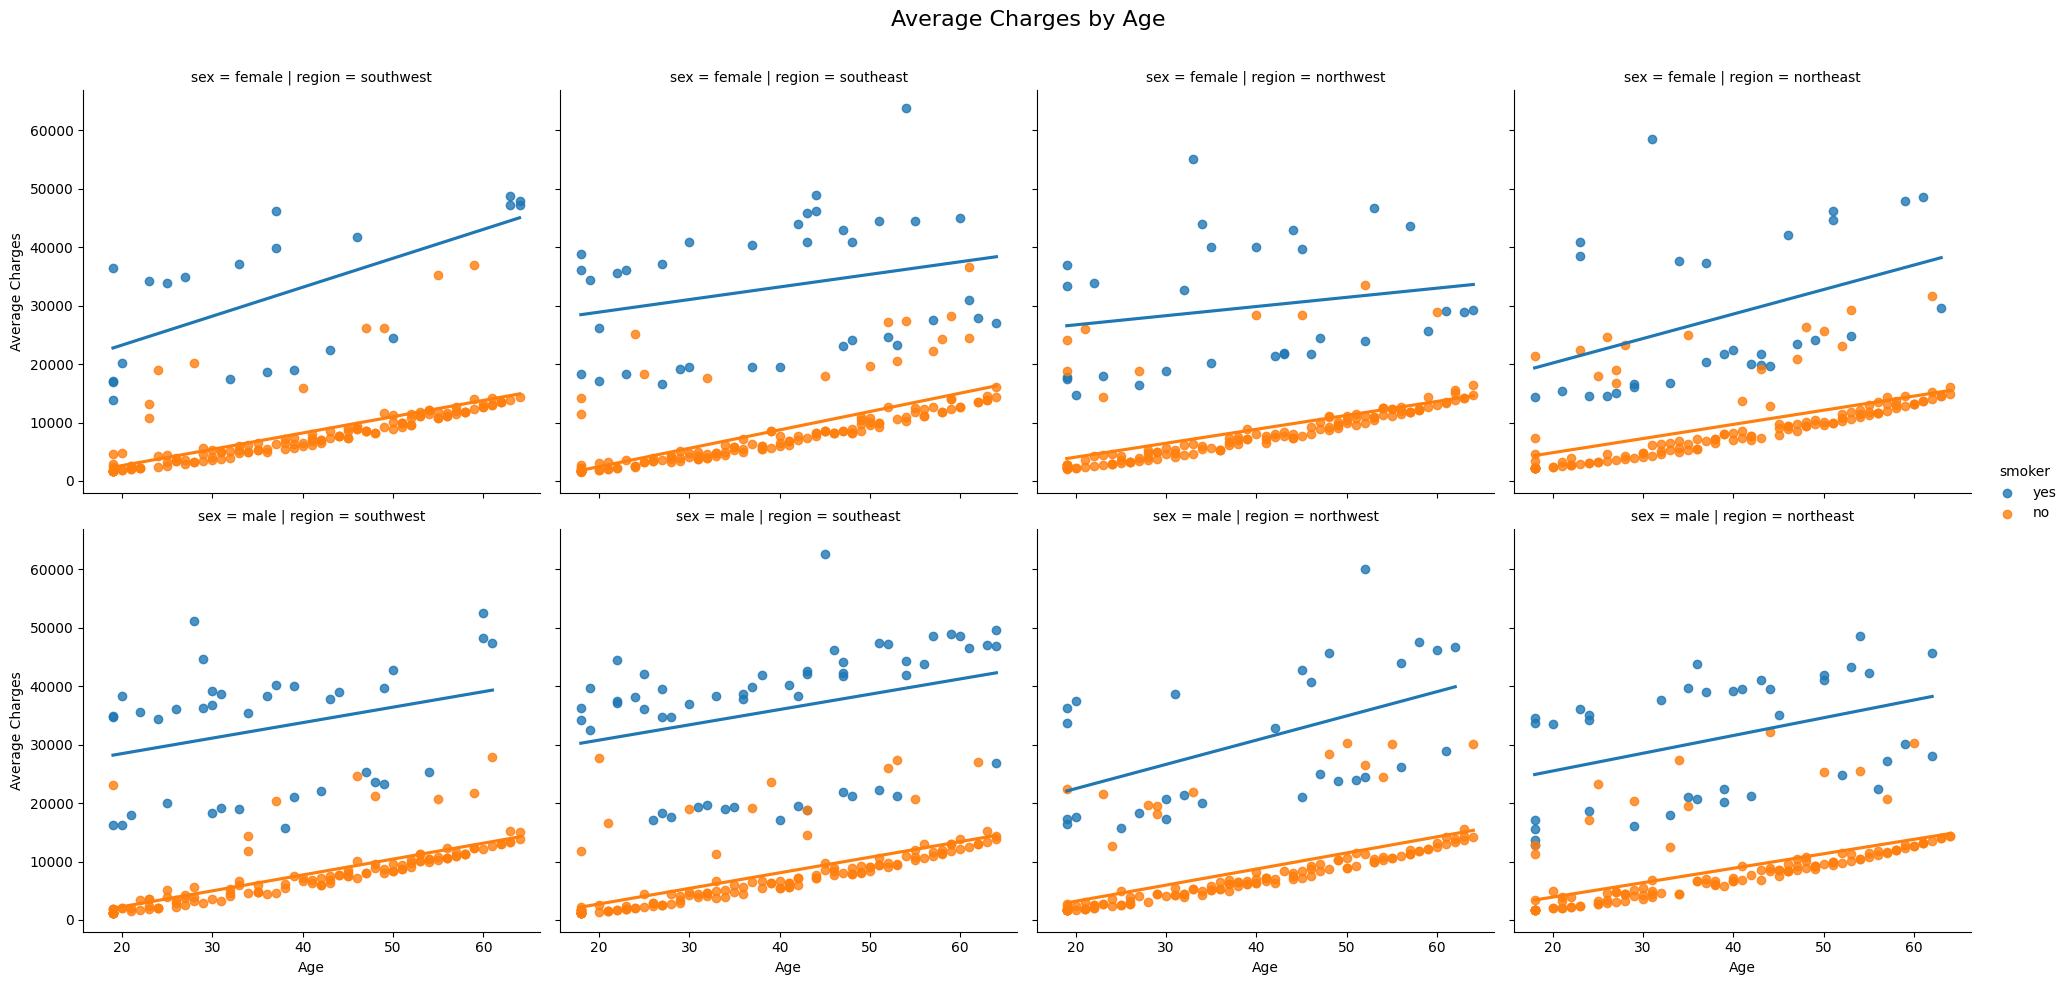

In [12]:
age_avg_charge_plot = sns.lmplot(data=df, x="age", y="charges", col="region",row='sex', hue="smoker", ci=None)

# Update labels and title
age_avg_charge_plot.set_axis_labels('Age', 'Average Charges')
age_avg_charge_plot.fig.suptitle('Average Charges by Age', fontsize=16)

# Adjust layout to avoid overlapping between the title and the charts
age_avg_charge_plot.fig.subplots_adjust(top=0.9)

plt.show()


Observations:
1) Charges generally increase with age
2) Smoker charges are higher than non-smoker
3) Non-smoker charges have similar trends for all regions, both for male and female.  Trends for the smoker charges are more varied amongst the regions.  This could be linked to the lower population size of the smokers relative to the non-smokers in the dataset

# 5 Additional visualisation

We will create an additional visualisation to help examine:

1) how charges are impacted by BMI grouping, in addition to the other attributes that have been considered so far (region, age, gender, smoker status);
2) if there are notable differences in charges between female and male

We will proceed with the analysis on charges, instead of average charges, here.

An interactive visualisation would be helpful for this purpose, enabling us to compare across different combinations of attributes.

We will first create a new field in the new dataframe to hold the combined attribute for gender and weight_group:

In [13]:
df_new = df
df_new["sex_weight"] = df_new["sex"].astype(str) + " / " + df_new["weight_group"].astype(str)
df_new.head()

,age,sex,bmi,children,smoker,region,charges,weight_group,sex_weight
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,female / Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese,male / Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese,male / Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal_weight,male / Normal_weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,male / Overweight


We will use the Plotly scatterplot to set out charts showing "charges vs age" for all regions, separating smoker and non-smoker.

We then use the interactive legend, which was built from the newly created combined gender and weight_group field, for the additional analyses.

In [14]:
visual_add = px.scatter(df, 
                 x="age", 
                 y="charges",   
                 color="sex_weight",
                 category_orders={"sex_weight": ["female / Underweight","female / Normal_weight","female / Overweight","female / Obese",
                                                 "male / Underweight","male / Normal_weight","male / Overweight","male / Obese"]}, #specify the order of the categories
                 hover_name="sex_weight", 
                 facet_row="smoker",
                 facet_col="region",
                 height=800, #change size to make the charts clearer
                 trendline="ols", #add ols trendline to aid visualisation
                 title="Charges by Age and Region",) #add chart title

visual_add.show()

Observations:
1) The trendlines in the second row, i.e. for the non-smokers, are clustered fairly closely together, for all gender/weight_group combinations.  This suggests that BMI (represented by weight_group) and gender are less material pricing attributes for the non-smokers.  Different regions exhibit similar trends.
2) The trendlines in the first row, i.e. for the smokers, are in stark contrast however.  Obese group has a considerably higher premium than other weight groups for both male and female.
3) A breif summary by comparing male and female charges individually across different weight groups:
    a) underweight - there is not enough data points for meaningful analysis or comparison;
    b) normal weight - results are quite mixed.  For exampl, female non-smoker charges look to be higher than male non-smoker for the Southeast region.  This seems to be caused by a couple of outliers for the female population with high charges.  Female smoker charges are broadly lower than male smoker for the Northeast region;
    c) overweight - male and female charges are much closely aligned relative to the other weight groups observed.
    d) obese - similar observation to the overweight group, though at higher values.

# Conclusions

We have produced some analyses, utilising visualisations, to meet our business requirements.

The results support our hypothesis that the insurance charges:

1) increase with age;
2) be higher for smoker; and
3) vary with BMI, which was modelled by weight_group categorisation 

Difference between female and male pricing is less conclusive, and further analyses are required.

Suggested next steps:

1) Analyse impact of number of children/dependents on the insurance charges, in addition to the attributes considered so far.
2) Drill down further into the obese group (instead of the simplified grouping categories used).
3) More data points in general and especially for the underweight class.
4) Examine some of the outliers identified in the last section, which may give greater insight of other contributing factors.
